In [184]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
from PIL import Image,ImageDraw

%matplotlib inline

In [194]:
def iouFun (image0,image1):
    (r01,r02,confidence)=image0
    (r11,r12,confidence)=image1
    (x01,y01)=r01
    (x02,y02)=r02
    (x11,y11)=r11
    (x12,y12)=r12
    leftXPoint=np.where(x01>x11,x01,x11)
    leftYPoint=np.where(y01>y11,y01,y11)   
    rightXPoint=np.where(x02>x12,x12,x02)
    rightYPoint=np.where(y02>y12,y12,y02)
    size=(x02-x01)*(y02-y01)
    size2=(x12-x11)*(y12-y11)
    size3=(leftXPoint-rightXPoint)*(leftYPoint-rightYPoint)
#     print("size:",size)    
#     print("size2:",size2)
#     print("size3:",size3)
    iou=size3/(size+size2-size3)
    # print("iouFun:",iou)
    if iou<0:
        return 0
    return iou
# 默认iou=0.3为同一类
def nmsFun(defaultIou=0.3,*arg):
    #存储移除的图象索引
    index=[]
    for i,(image0,image1,confidence) in enumerate(arg):
        j=i+1
        # 存在需要移除图象则即跳出循环
        if i in enumerate(index):
            break
        #每次大循环前将maxConfidence至为0,lst存储Iou以及对应的图象,
        maxConfidence=0
        for _,(image0,image1,confidence) in enumerate(arg[j:]):
             # 存在需要移除图象则即跳出循环
            if j in enumerate(index):
                break
            newIou= iouFun(arg[i],arg[j])
            if newIou < defaultIou:
                maxConfidence=max(arg[i][2],arg[j][2])
                #如果是最大的置信度则保留,相同分类中置信度小的添加到移除索引
                if arg[i][2]==maxConfidence:
                    index.append(j)
                else:
                    index.append(i)
    index=list(set(index))
    print("index:",index)
    lst=list(arg)
    #根据需要移除的坐标删除数据
    for index in sorted(index, reverse=True):
        del lst[index]
    return lst


def pltFun(image0,img,imgName):
    (r01,r02,confidence)=image0
    (x01,y01)=r01
    (x02,y02)=r02
    
    dr = ImageDraw.Draw(img)
    (x01,y01)=r01  
    (x02,y02)=r02
    dr.rectangle(((x01,y01),(x02,y02)), fill=None, outline = 0)
    img.save(imgName)
    
def createImage(imgName):
    img = Image.new('RGB', (100, 100), color = (255,255,255))   
    img.save(imgName)
    return img


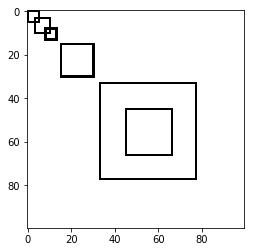

In [195]:
# 创建图象坐标点
image0_x=np.array((0,0))
image0_y=np.array((5,5))
image1_x=np.array((3,3))
image1_y=np.array((10,10))
image2_x=np.array((8,8))
image2_y=np.array((13,13))
image3_x=np.array((15,15))
image3_y=np.array((30,30))
image4_x=np.array((45,45))
image4_y=np.array((66,66))
image5_x=np.array((33,33))
image5_y=np.array((77,77))
image0=(image0_x,image0_y,0.7)
image1=(image1_x,image1_y,0.8)
image2=(image2_x,image2_y,0.65)
image3=(image3_x,image3_y,0.8)
image4=(image4_x,image4_y,0.6)
image5=(image5_x,image5_y,0.7)
# 创建图片
imgName="rectangle.png"
img=createImage(imgName)
#进行画图
pltFun(image0,img,imgName)
pltFun(image1,img,imgName)
pltFun(image2,img,imgName)
pltFun(image3,img,imgName)
pltFun(image4,img,imgName)
pltFun(image5,img,imgName)

#显示图片
pil_im = Image.open(imgName, 'r')
imshow(np.asarray(pil_im))

#计算IOU
# print("IOU:",iouFun(image0,image1))
# print("IOU3:",iouFun(image0,image5))



index: [2, 4]


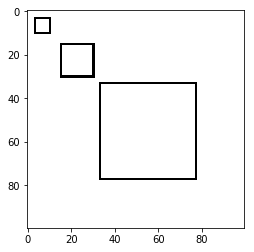

In [206]:
# 创建图片
imgName2="rectangle2.png"
img2=createImage(imgName2)
res=nmsFun(0.3,image0,image1,image2,image3,image4,image5)
# #进行画图
for i in range(len(res)):
    image0=(res[i][0],res[i][1],res[i][2])
    pltFun(image0,img2,imgName2)
#显示图片
pil_im2 = Image.open(imgName2, 'r')
imshow(np.asarray(pil_im2))